# Bruno Carros - Analisando as vendas  

In [2]:
import pandas as pd 

In [3]:
alucar  = pd.read_csv('alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas :',alucar.shape)

Quantidade de linhas e colunas : (24, 2)


In [6]:
print('Quantidade de dados nulos : ', alucar.isna().sum().sum())

Quantidade de dados nulos :  0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])


In [9]:
alucar.dtypes


mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [11]:
print(sns.__version__)

0.9.0


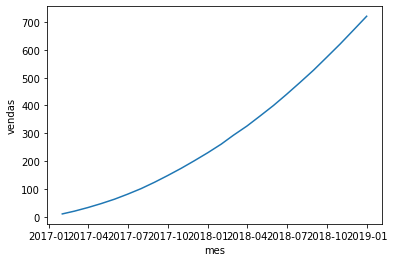

In [12]:
sns.lineplot(x='mes', y='vendas', data= alucar)

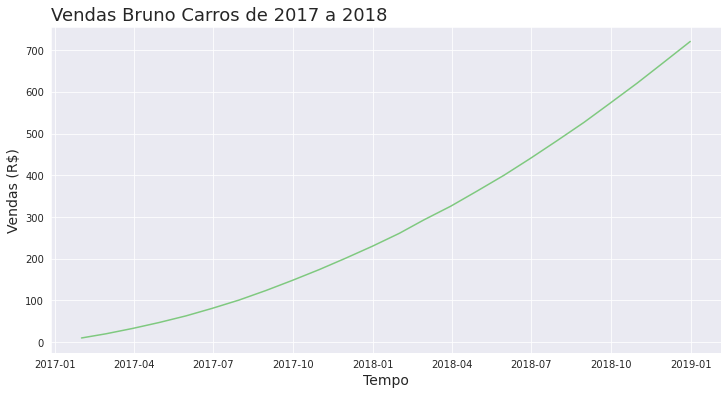

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas Bruno Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [14]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [15]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


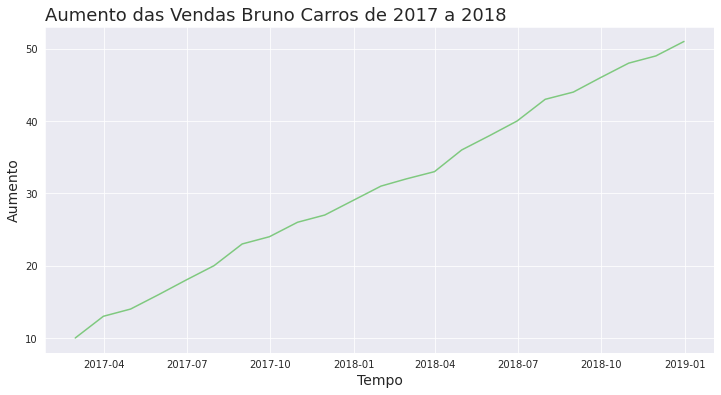

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data= alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das Vendas Bruno Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [17]:
def plotar(titulo, labelx,labely, x, y,dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data= dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo , loc = 'left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

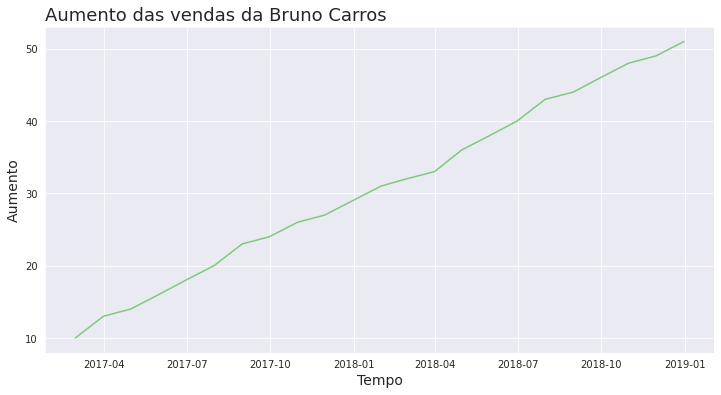

In [100]:
plotar('Aumento das vendas do BrunoCarros','Tempo','Aumento',
       'mes','aumento', alucar
) 

In [101]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [102]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


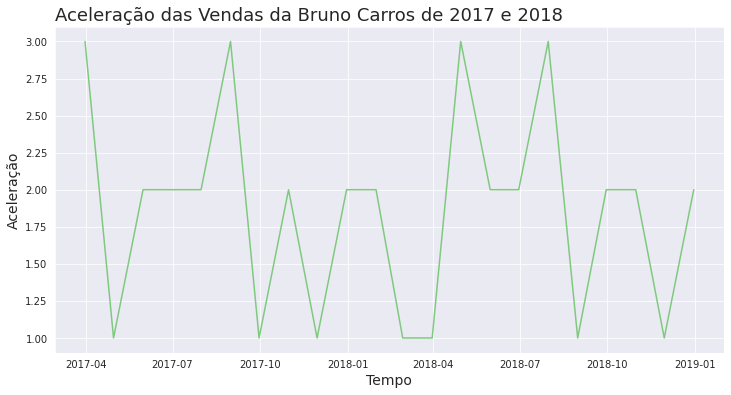

In [103]:
plotar('Aceleração das vendas do BrunoCarros de 2017 e 2018','Tempo','Aceleração',
       'mes','aceleracao',alucar)

Criando três graficos juntos , em uma mesma plotagem 


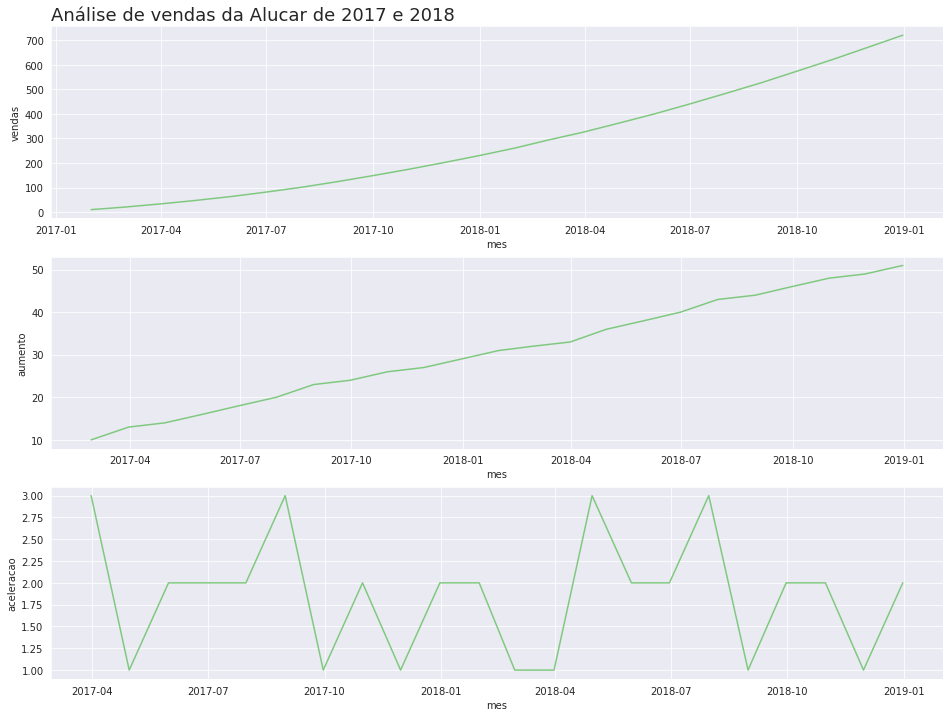

In [22]:
plt.figure(figsize =(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas do Bruno  Carros de 2017 e 2018", fontsize=18 , loc ='left')
sns.lineplot(x='mes', y='vendas', data= alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data= alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data= alucar)
ax= ax

Criando uma função para obter a compração entre os gráficos

In [23]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize =(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18 , loc ='left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y= y3, data = dataset)





  ax= ax



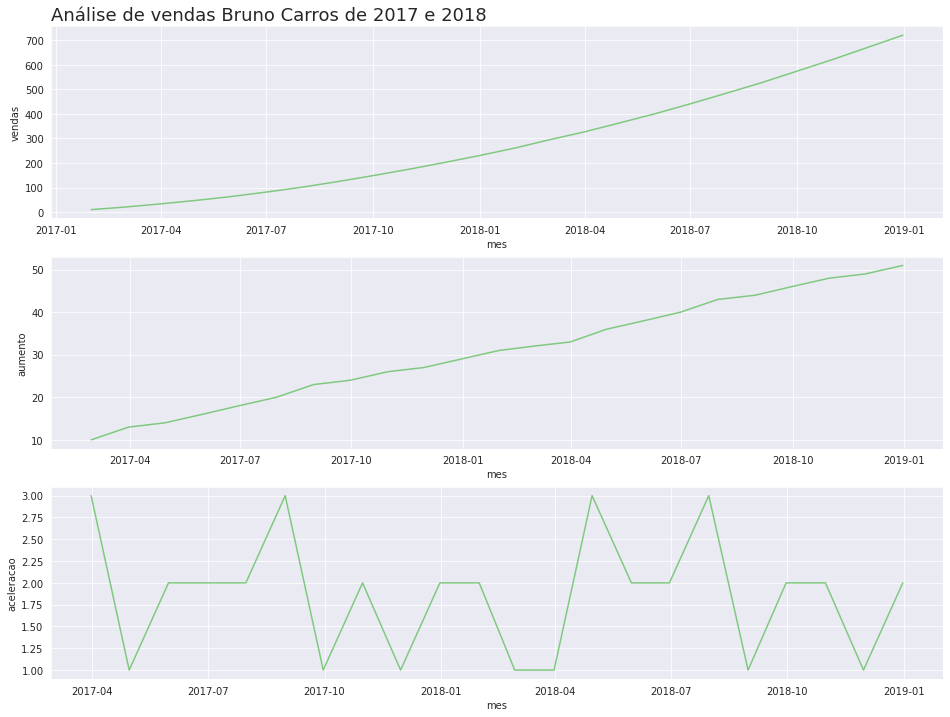

In [104]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                alucar,'Análise de vendas Bruno Carros de 2017 e 2018')

Autocorrelação com o pandas

In [25]:
from pandas.plotting import autocorrelation_plot

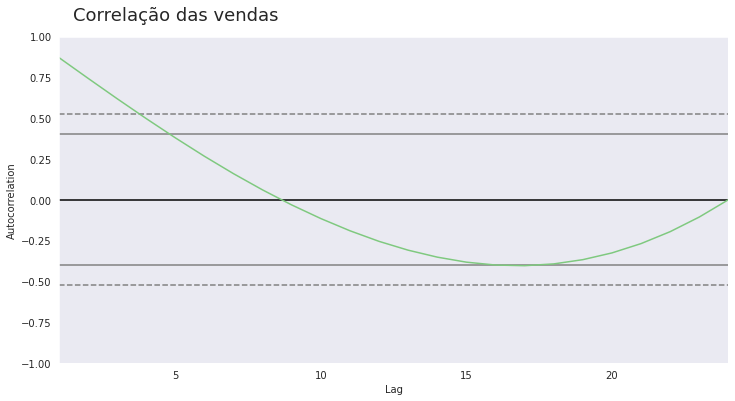

In [26]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação das vendas", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

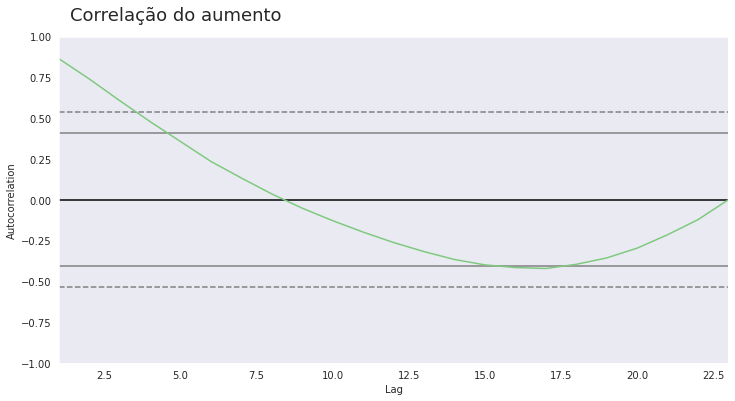

In [27]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação do aumento", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])

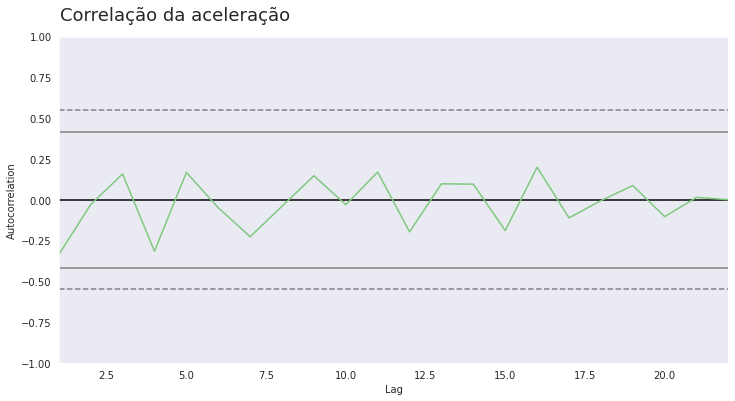

In [28]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação da aceleração", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])

**Interpretação da autocorrelação**
>
>

**Autocorrelação____________Interpretação**
>       1	              correlação perfeita positiva
>     7 a 0,9       	  correlação forte
>     0,4 a 0,7       	correlação moderada
>     0,2 a 0,4        	correlação fraca
>       0              	correlação nula
>     < 0	              correlação negativa
>      -1	              correlação perfeita negativa

# Alucar - Analisando assinantes da newsletter

In [29]:
assinantes = pd.read_csv("/content/newsletter_alucar.csv")

In [30]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [31]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [32]:
print("A quantidade de linha e colunas: ",assinantes.shape)
print("A quantidade de dados nulos: ", assinantes.isna().sum().sum())

A quantidade de linha e colunas:  (24, 2)
A quantidade de dados nulos:  0


In [33]:
assinantes['mes']= pd.to_datetime(assinantes['mes'])

In [34]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [35]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [36]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


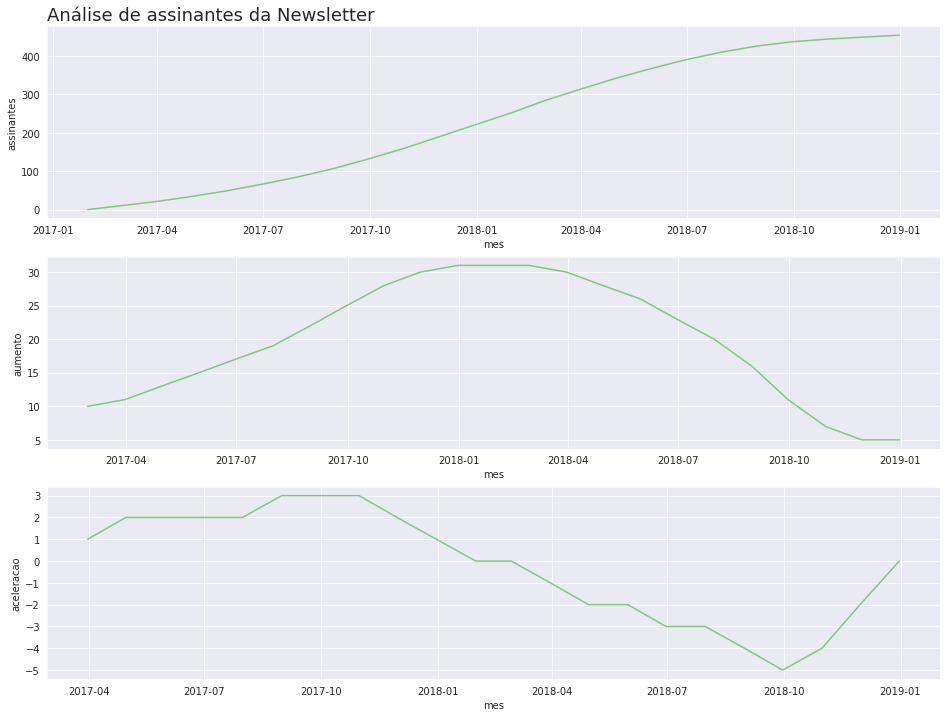

In [37]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de assinantes da Newsletter ')

# Chocolura -  Analisnado as vendas


In [38]:
chocolura = pd.read_csv("/content/chocolura.csv")

In [39]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [41]:
chocolura['mes'] =pd.to_datetime(chocolura['mes'])

In [42]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [43]:
print("A quantidade de linha e colunas:",chocolura.shape)
print("A quantidade de dados nulos:", chocolura.isna().sum().sum())

A quantidade de linha e colunas: (24, 2)
A quantidade de dados nulos: 0


In [44]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [45]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


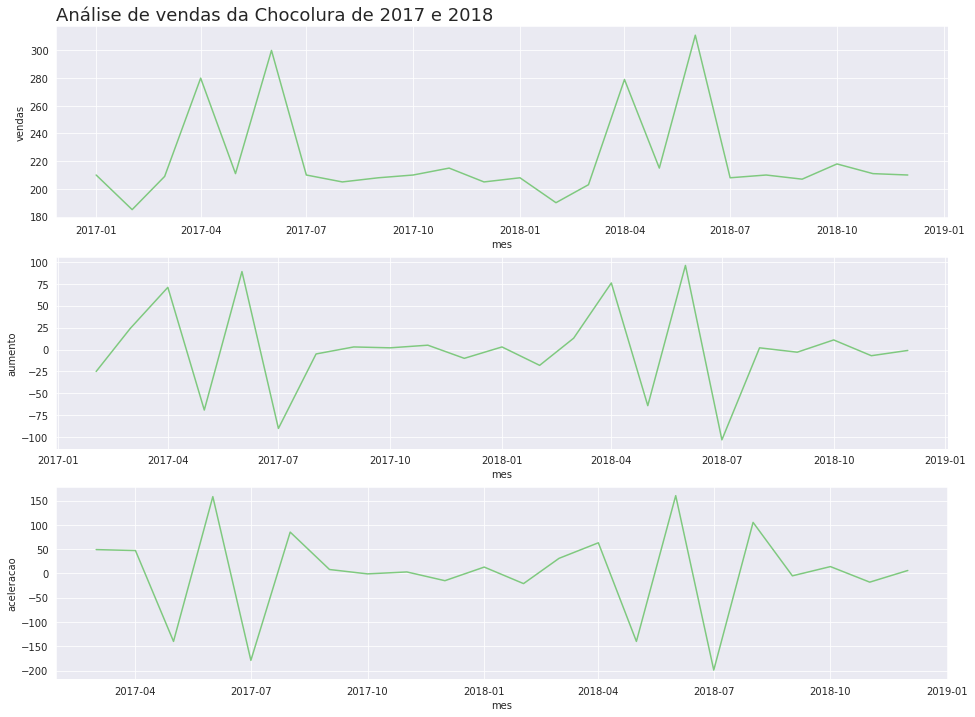

In [46]:
plot_comparacao('mes','vendas','aumento',
                'aceleracao',chocolura,'Análise de vendas da Chocolura de 2017 e 2018')

# Chocolura - Vendas diárias(outubo e novembro)

In [47]:
vendas_por_dia = pd.read_csv("/content/vendas_por_dia.csv")

In [48]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [49]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [50]:
vendas_por_dia['dia'] =pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [51]:
print("A quantidade de linha e colunas:",vendas_por_dia.shape)
print("A quantidade de dados nulos:", vendas_por_dia.isna().sum().sum())

A quantidade de linha e colunas: (61, 2)
A quantidade de dados nulos: 0


In [52]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


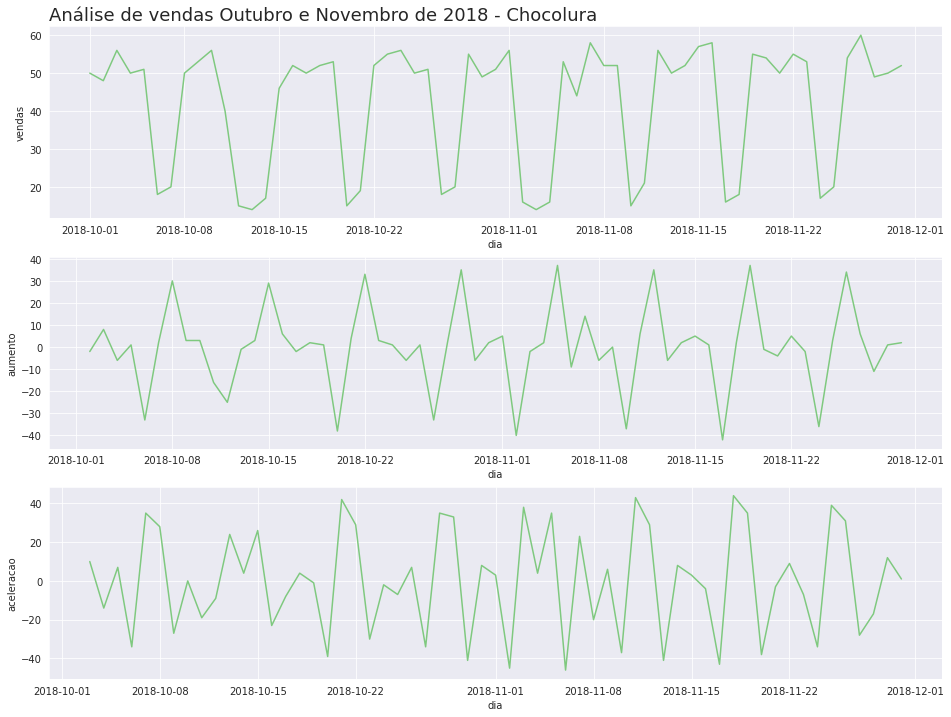

In [53]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                vendas_por_dia,'Análise de vendas Outubro e Novembro de 2018 - Chocolura')

#Analisando a sazonalidade

In [54]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()


In [55]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [56]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [57]:
dias_traduzidos = {
    'Monday':'Segunda',
    'Tuesday':'Terca',
    'Wednesday':'Quarta',
    'Thursday':'Quinta',
    'Friday':'Sexta',
    'Saturday':'Sabado',
    'Sunday':'Domingo'
}

In [58]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)  

In [59]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [60]:
vendas_agrupadas =  vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-60-bc6305cdd6d6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas =  vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [61]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

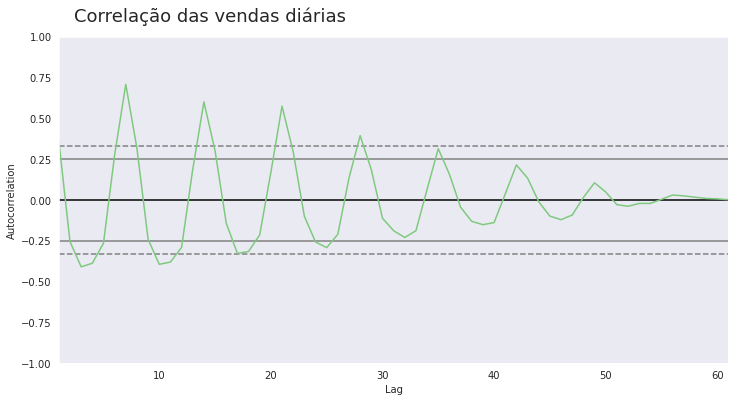

In [62]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18 , x=0.3 , y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax= ax

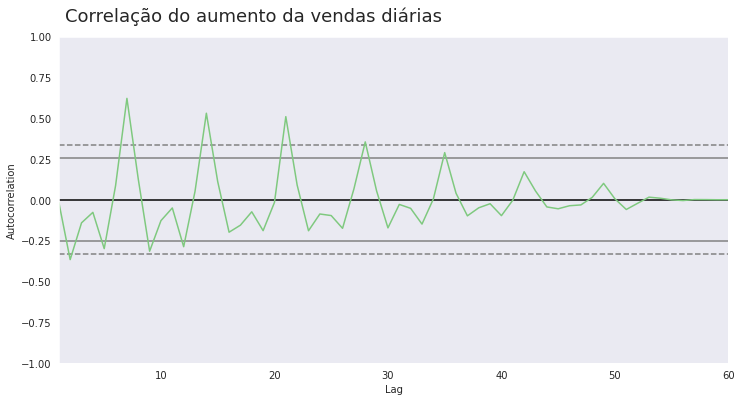

In [63]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento da vendas diárias', fontsize=18 , x=0.35 , y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax= ax

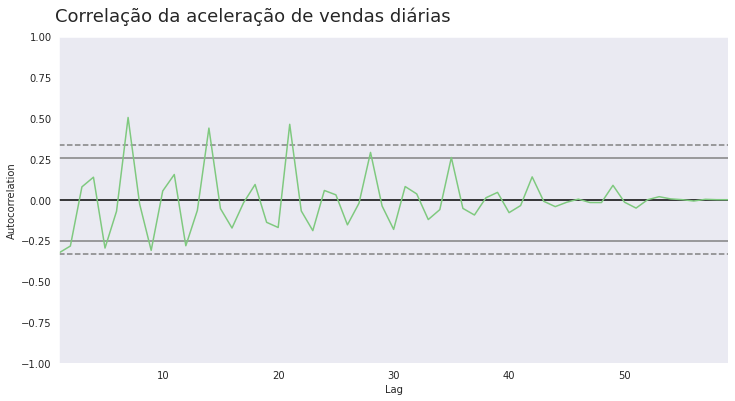

In [64]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração de vendas diárias', fontsize=18 , x=0.35 , y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax= ax

# Cafelura - Análise de vendas

In [65]:
cafelura = pd.read_csv('/content/cafelura.csv')

In [66]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [67]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [68]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [69]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [70]:
print("A quantidade de linha e colunas:",cafelura.shape)
print("A quantidade de dados nulos:", cafelura.isna().sum().sum())

A quantidade de linha e colunas: (24, 2)
A quantidade de dados nulos: 0


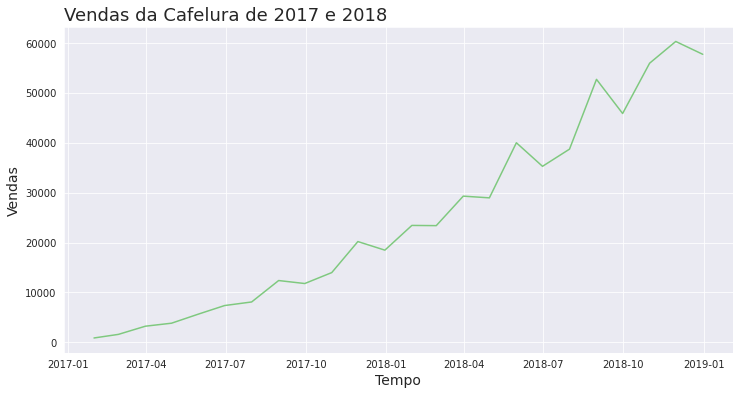

In [71]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo','Vendas','mes','vendas', cafelura)

In [72]:
quantidade_de_dias_de_fds = pd.read_csv('/content/dias_final_de_semana.csv')

In [73]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [74]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [75]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [76]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


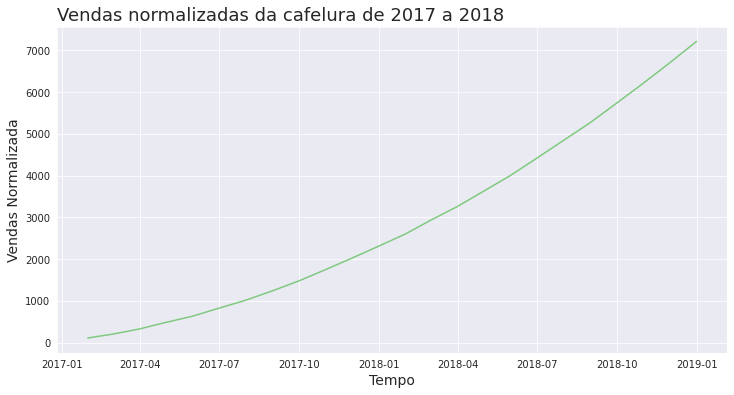

In [77]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018', 'Tempo','Vendas Normalizada',
       'mes','vendas_normalizadas', cafelura)

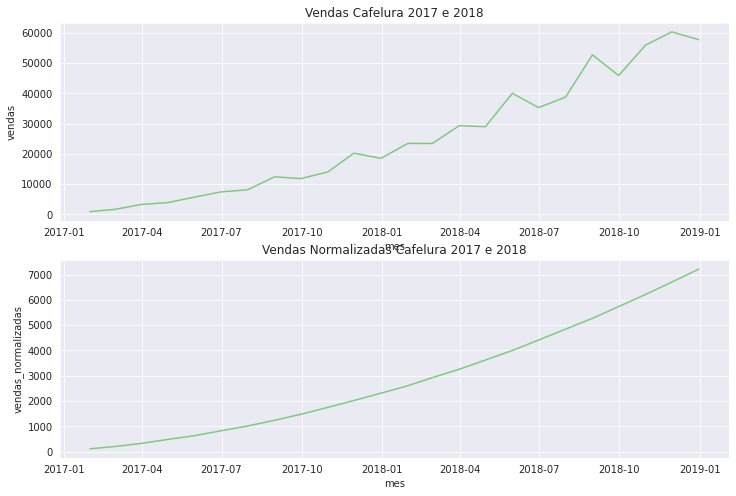

In [78]:
plt.figure(figsize = (12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018')
sns.lineplot(x='mes',y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018')
sns.lineplot(x='mes',y='vendas_normalizadas', data=cafelura)
ax= ax

# Statsmodels

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-80-af3a85812081>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose(chocolura['vendas'],  freq=3)


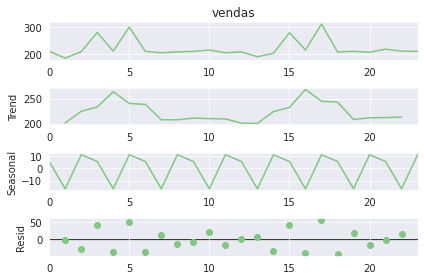

In [80]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [81]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [82]:
data = ({
    'observacao':observacao,
    'tendencia': tendencia,
    'sazonalidade' : sazonalidade,
    'ruido': ruido
})

In [83]:
resultado = pd.DataFrame(data)

In [84]:
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


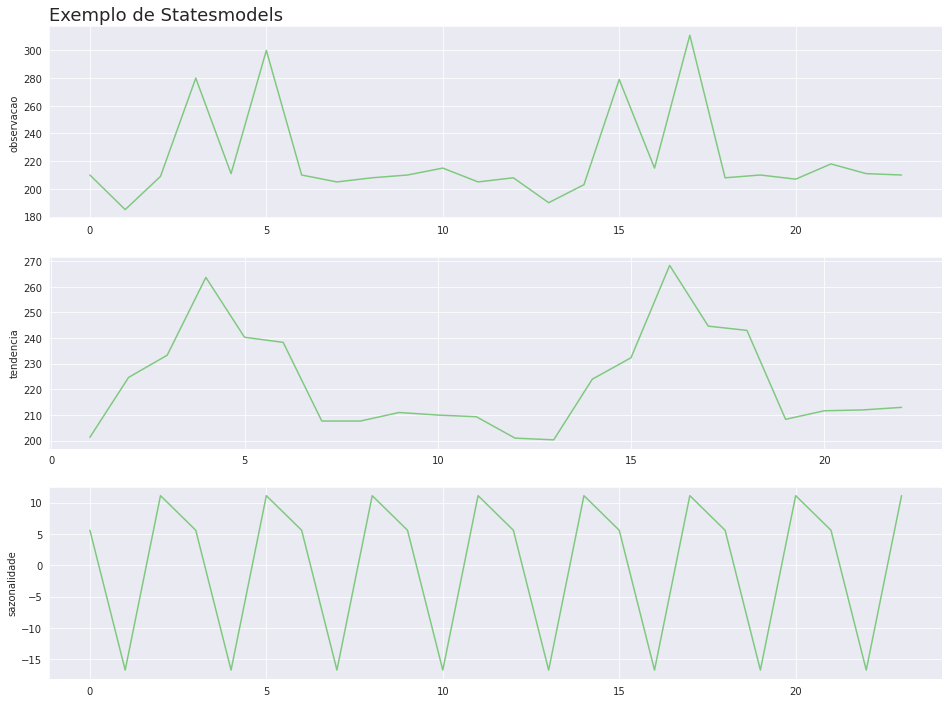

In [85]:
plot_comparacao(resultado.index, 'observacao','tendencia','sazonalidade',resultado,'Exemplo de Statesmodels' )

# Alucel - Análise de vendas

In [86]:
alucel = pd.read_csv('/content/alucel.csv')

In [87]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [88]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [89]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [90]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [91]:
print("A quantidade de linha e colunas:",alucel.shape)
print("A quantidade de dados nulos:", alucel.isna().sum().sum())

A quantidade de linha e colunas: (61, 2)
A quantidade de dados nulos: 0


In [92]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


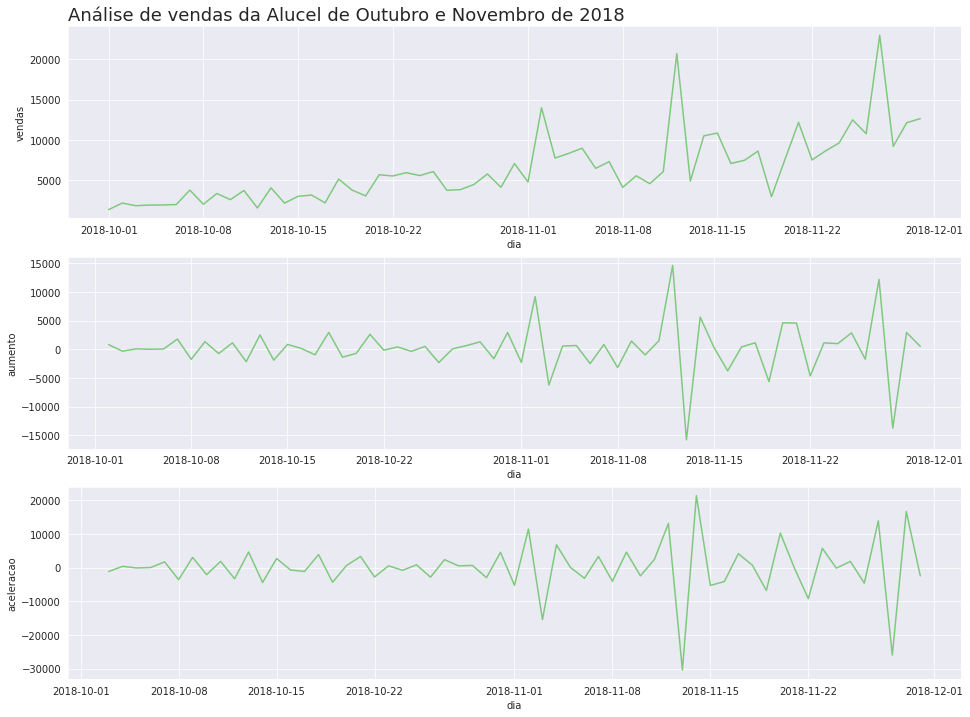

In [93]:
plot_comparacao('dia','vendas', 'aumento','aceleracao',alucel,'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média movel**

In [94]:
alucel['media_movel'] =  alucel['vendas'].rolling(7).mean()

In [95]:
alucel.head(8)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143


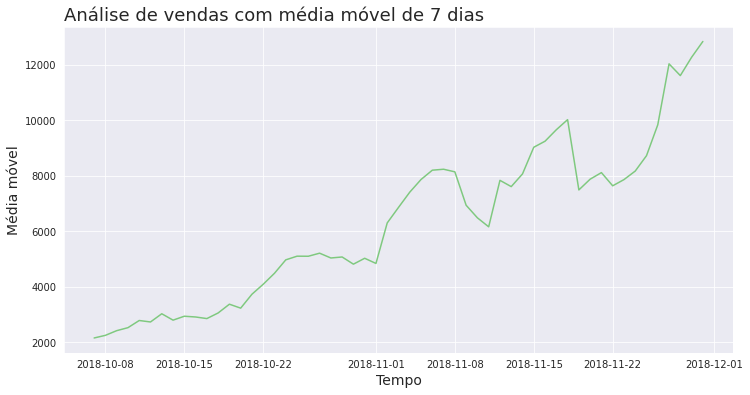

In [96]:
plotar('Análise de vendas com média móvel de 7 dias',
       'Tempo','Média móvel', 'dia','media_movel', alucel )

In [97]:
alucel['media_movel_21'] =  alucel['vendas'].rolling(21).mean()

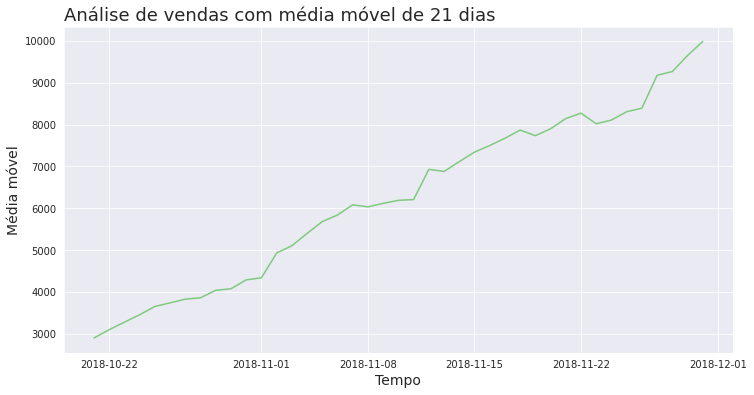

In [98]:
plotar('Análise de vendas com média móvel de 21 dias',
       'Tempo','Média móvel', 'dia','media_movel_21', alucel )

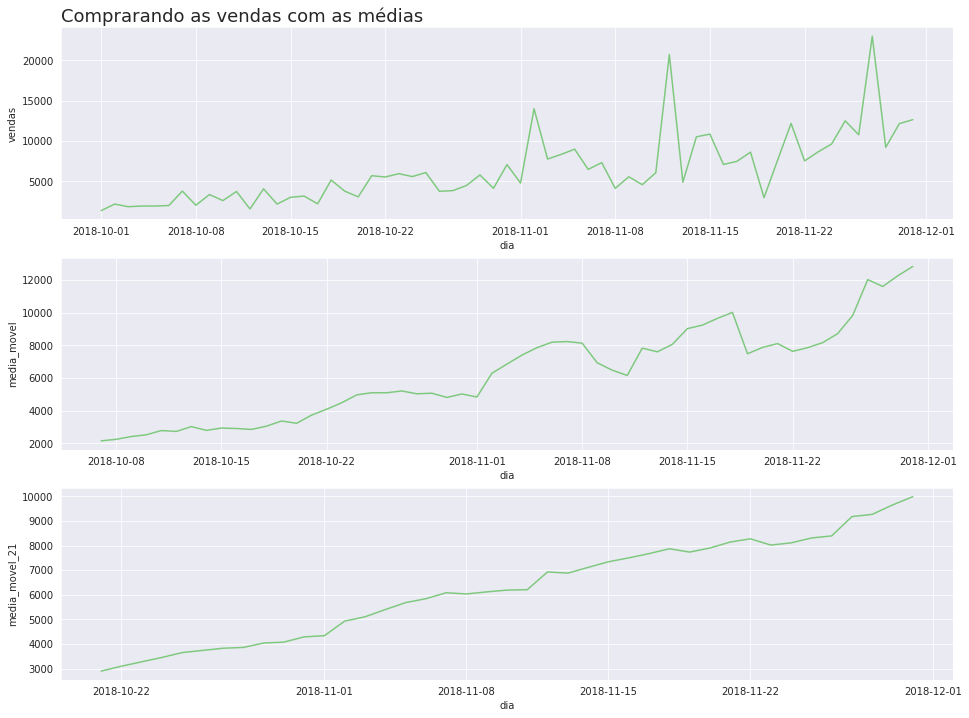

In [99]:
plot_comparacao('dia', 'vendas','media_movel','media_movel_21',
                alucel, 'Comprarando as vendas com as médias')